In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import scipy.stats as sts

In [2]:
# Files to load
city_data_to_load = os.path.join("Resources", "city_data.csv")
ride_data_to_load = os.path.join("Resources", "ride_data.csv")

In [3]:
# Read the city and ride datafiles and store them to a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Merge the ride and city data.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# Calculate data needed for the summary dataframe.

# Get the total number of rides for each city type.
total_rider_count = pyber_data_df.groupby(["type"]).count()["ride_id"]

# Get the total number of drivers for each city type.
total_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]

# Get the total fares for each city type.
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

# Get the average fare per ride for each city type.
average_ride_fare = total_fares / total_rider_count

# Get the average fare per driver for each city type.
average_driver_fare = total_fares / total_driver_count

In [6]:
# Create the summary dataframe with the calculated data.
pyber_data_summary_df = pd.DataFrame({
    "Total Rides": total_rider_count,
    "Total Drivers": total_driver_count,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_ride_fare,
    "Average Fare per Driver": average_driver_fare})

# Delete index title.
pyber_data_summary_df.index.name = None

# Format the columns.
pyber_data_summary_df["Total Rides"] = pyber_data_summary_df["Total Rides"].map("{:,}".format)
pyber_data_summary_df["Total Drivers"] = pyber_data_summary_df["Total Drivers"].map("{:,}".format)
pyber_data_summary_df["Total Fares"] = pyber_data_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_data_summary_df["Average Fare per Ride"] = pyber_data_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_data_summary_df["Average Fare per Driver"] = pyber_data_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

# Display the PyBer data summary.
pyber_data_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [7]:
# PART 2

# Rename the columns on the merged DataFrame.
pyber_data_df = pyber_data_df.rename(columns={"city": "City", 
                                              "date": "Date", 
                                              "fare": "Fare", 
                                              "ride_id": "Ride Id", 
                                              "driver_count": "Driver Count", 
                                              "type": "City Type"})

In [19]:
# Set the index to the Date column.
pyber_data_df.set_index(["Date"], drop=False, inplace=True)

In [20]:
# Create a new DataFrame for fares and include only the Date, City Type, and Fare.
pyber_date_type_fare_df = pyber_data_df.copy()
pyber_date_type_fare_df = pyber_date_type_fare_df[["Date", "City Type", "Fare"]]

In [21]:
# Drop the extra Date column.
pyber_date_type_fare_df = pyber_date_type_fare_df.drop(columns="Date")

In [22]:
# Set the index to the datetime data type
pyber_date_type_fare_df.index = pd.to_datetime(pyber_date_type_fare_df.index)

In [23]:
# Check the DataFrame using the info() method to make sure the index is a datetime data type.
pyber_date_type_fare_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [24]:
# Calculate the sum() of fares by the type of city and date using groupby() to create a new DataFrame.
fare_total_by_type_date_df = pd.DataFrame(pyber_date_type_fare_df.groupby(['City Type', 'Date']).sum()["Fare"])

In [25]:
# Reset the index, which is needed for Step 10.
fare_total_by_type_date_df.reset_index()


,City Type,Date,Fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [26]:
# Create a pivot table DataFrame with the Date as the index and columns = 'City Type' with the Fare for each Date in each row.
fare_total_pivot_df = fare_total_by_type_date_df.pivot_table(index = "Date", columns = "City Type")

In [27]:
# Create a new DataFrame from the pivot table DataFrame on the given dates '2019-01-01':'2019-04-28' using loc.
fare_total_pivot_df = fare_total_pivot_df.loc[(fare_total_pivot_df.index >= '2019-01-01') &
                              (fare_total_pivot_df.index <= '2019-04-28')]

In [29]:
# Create a new DataFrame by setting the DataFrame you created in Step 11 with resample() in weekly bins, 
# and calculate the sum() of the fares for each week.
fare_total_pivot_df = fare_total_pivot_df.resample("W").sum()
fare_total_pivot_df

Fare                  
City Type    Rural Suburban    Urban
Date                                
2019-01-06  187.92   721.60  1661.68
2019-01-13   67.65  1105.13  2050.43
2019-01-20  306.00  1218.20  1939.02
2019-01-27  179.69  1203.28  2129.51
2019-02-03  333.08  1042.79  2086.94
2019-02-10  115.80   974.34  2162.64
2019-02-17   95.82  1045.50  2235.07
2019-02-24  419.06  1412.74  2466.29
2019-03-03  175.14   858.46  2218.20
2019-03-10  303.94   925.27  2470.93
2019-03-17  163.39   906.20  2044.42
2019-03-24  189.76  1122.20  2368.37
2019-03-31  199.42  1045.06  1942.77
2019-04-07  501.24  1010.73  2356.70
2019-04-14  269.79   784.82  2390.72
2019-04-21  214.14  1149.27  2303.80
2019-04-28  191.85  1169.04  1909.51

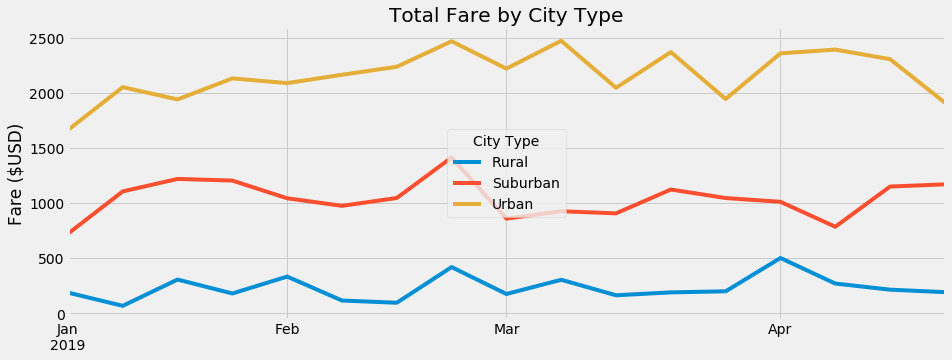

In [30]:
# Use the graph style fivethirtyeight.
plt.style.use("fivethirtyeight")

# Using the object-oriented interface method, plot the DataFrame
ax = fare_total_pivot_df.plot(figsize=(14,5))
fig = ax.get_figure()

# Add title and axes labels
ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_xlabel(None)

# Format legend
ax.legend(["Rural", "Suburban", "Urban"], loc="center", title="City Type")

plt.savefig("analysis/PyBer_Challenge.png", bbox_inches="tight")
plt.show()